# Задание

### 1. Линейная регрессия:
1) Разработать модель линейной регрессии, учитывающей все (в примере),2,3 столбца входных переменных.
2) Рассчитать MSE.
3) Вывести значения коэффициентов модели.
### 2. Полиномиальная регрессия:
1) Разработать модель линейной регрессии, базисные функции - полином от исходных значений. 
2) Найти зависимость MSE от максимальной степени полинома. (max_pow <= 10)
### 3. Регуляризация. Гребневая регрессия:
1) Выбрать оптимальную степень полинома.
2) Построить график зависимости максимального модуля параметров, MSE от величины alpha.
### 4. Регуляризация. Лассо:
1) Выбрать оптимальную степень полинома.
2) Построить график зависимости максимального модуля параметров, MSE от величины alpha. 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html 

linear_model.Lasso(alpha=0.1)
### 5. SVR:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR

1) Исследовать точность модели регрессии при применении  ядерных функций 'poly', 'sigmoid'
2) Реализовать модель SVR, учитывающую все характеристики исходных данных, выбрать модель с оптимальными параметрами.

# Решение

Загрузка данных

In [407]:
import pandas as pd

def load_data(file_path):
    df = pd.read_csv(file_path)
    df.drop(df.columns[[0]], axis=1, inplace=True)  # Удаление ненужного столбца c id
    df.info()
    return df

def get_X_y(df):
    return df[['TV', 'radio', 'newspaper']], df['sales']

Преобразавоние результата в датафрейм

In [408]:
def get_dataframe(results, title):
    results_df = pd.DataFrame(results)
    print(title)
    return results_df

Линейная регрессия

In [409]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def linear_regression_analysis(df):

    results = []

    for n_features in range(1, 4):

        X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :n_features], get_X_y(df)[1], random_state=1)

        lr = LinearRegression()
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)

        results.append({
            'Кол-во признаков': n_features,
            'MSE': mean_squared_error(y_test, y_pred),
            'Коэффициенты': ', '.join([f'{coef:.10f}' for coef in lr.coef_]),
            'Перехват': lr.intercept_
        })

    return get_dataframe(results, '1. Линейная регрессия c различными признаками')

Полиномиальная регрессия и зависимость MSE от степени полинома

In [410]:
from sklearn.preprocessing import PolynomialFeatures, maxabs_scale
import matplotlib.pyplot as plt

def polynomial_regression_analysis(df, max_pow = 10):
    
    X, y = get_X_y(df)
    X_maxabs = maxabs_scale(X, axis=0)
    mse_values = []
    results = []
    
    for degree in range(1, max_pow + 1):

        poly = PolynomialFeatures(degree)
        X_poly = poly.fit_transform(X_maxabs)

        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=1)

        lr_poly = LinearRegression()
        lr_poly.fit(X_train, y_train)
        y_pred = lr_poly.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)

        mse_values.append(mse)

        results.append({
            'Степень полинома': degree,
            'MSE': mse
        })
    
    plt.plot(range(1, max_pow + 1), mse_values, marker='o')
    plt.xlabel('Степень полинома')
    plt.ylabel('MSE')
    plt.title('Зависимость MSE от степени полинома')
    plt.show()

    return get_dataframe(results, '2. Полиномиальная регрессия и зависимость MSE от степени полинома')

Гребневая регрессия и влияние параметра alpha

In [411]:
import numpy as np
from sklearn.linear_model import Ridge

def ridge_regression_analysis(df, max_degrees=range(1, 15), alpha_values=np.logspace(-3, 3, 100)):
    
    X, y = get_X_y(df)
    X_maxabs = maxabs_scale(X, axis=0)
    
    best_degree = None
    best_mse = float('inf')
    best_mse_values = []
    
    for degree in max_degrees:
        poly = PolynomialFeatures(degree)
        X_poly = poly.fit_transform(X_maxabs)
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=1)
        
        ridge_mse_values = []
        ridge_coef_max = []
        
        for alpha in alpha_values:
            ridge = Ridge(alpha=alpha)
            ridge.fit(X_train, y_train)
            y_pred = ridge.predict(X_test)
            
            mse = mean_squared_error(y_test, y_pred)
            ridge_mse_values.append(mse)
            ridge_coef_max.append(np.max(np.abs(ridge.coef_)))
        
        avg_mse = np.mean(ridge_mse_values)
        best_mse_values.append(avg_mse)
        
        # Обновляем лучшую степень, если MSE стало меньше
        if avg_mse < best_mse:
            best_mse = avg_mse
            best_degree = degree
    
    print(f'Оптимальная степень полинома: {best_degree} с средним MSE: {best_mse}')
    
    # График зависимости средней ошибки от степени полинома
    plt.figure(figsize=(8, 5))
    plt.plot(max_degrees, best_mse_values, marker='o')
    plt.xlabel('Степень полинома')
    plt.ylabel('Среднее MSE')
    plt.title('Зависимость MSE от степени полинома')
    plt.show()

Лассо-регрессия и влияние параметра alpha

In [412]:
from sklearn.linear_model import Lasso

def lasso_regression_analysis(df, max_degrees=range(1, 15), alpha_values=np.logspace(-3, 3, 100)):
    
    X, y = get_X_y(df)
    X_maxabs = maxabs_scale(X, axis=0)
    
    best_degree = None
    best_mse = float('inf')
    best_mse_values = []
    
    for degree in max_degrees:
        poly = PolynomialFeatures(degree)
        X_poly = poly.fit_transform(X_maxabs)
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=1)
        
        lasso_mse_values = []
        lasso_coef_max = []
        
        for alpha in alpha_values:
            lasso = Lasso(alpha=alpha)
            lasso.fit(X_train, y_train)
            y_pred = lasso.predict(X_test)
            
            mse = mean_squared_error(y_test, y_pred)
            lasso_mse_values.append(mse)
            lasso_coef_max.append(np.max(np.abs(lasso.coef_)))
        
        avg_mse = np.mean(lasso_mse_values)
        best_mse_values.append(avg_mse)
        
        if avg_mse < best_mse:
            best_mse = avg_mse
            best_degree = degree
    
    print(f'Оптимальная степень полинома: {best_degree} с средним MSE: {best_mse}')

    plt.plot(alpha_values, lasso_mse_values, label='MSE')
    plt.plot(alpha_values, lasso_coef_max, label='Максимальный модуль коэффициентов')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('Значение')
    plt.title('Лассо: MSE и максимальный модуль параметров')
    plt.legend()
    plt.show()

SVR с разными ядрами

In [413]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

def get_best_params(X_train, y_train, kernels, model = SVR()):
    param_grid = {
        'C': [0.1, 1, 10, 100, 1000, 10000],
        'gamma': [0.01, 0.1, 1],
        'epsilon': [0.01, 0.1, 1],
        'kernel': kernels
    }

    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print('Лучшие параметры:', grid_search.best_params_)

    return grid_search.best_params_

In [414]:
def svr_analysis(df, kernels=['poly', 'sigmoid']):

    X, y = get_X_y(df)
    X_maxabs = maxabs_scale(X, axis=0)

    X_train, X_test, y_train, y_test = train_test_split(X_maxabs, y, random_state=1)

    best_params = get_best_params(X_train, y_train, kernels)

    results = []
    
    for kernel in kernels:
        svr = SVR(kernel=kernel, C=best_params['C'], gamma=best_params['gamma'], epsilon=best_params['epsilon'])
        svr.fit(X_train, y_train)
        y_pred = svr.predict(X_test)

        results.append({
            'Ядро': kernel,
            'MSE': mean_squared_error(y_test, y_pred)
        })

    return get_dataframe(results, '5. SVR с различными ядрами')

Результ

In [415]:
df = load_data('Advertising (1).csv')

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [416]:
linear_regression_analysis(df)

1. Линейная регрессия c различными признаками


,Кол-во признаков,MSE,Коэффициенты,Перехват
0,1,10.310070,0.0480294500,6.911973
1,2,1.926276,"0.0466023407, 0.1811795920",2.927237
2,3,1.973046,"0.0465645679, 0.1791581225, 0.0034504647",2.876967


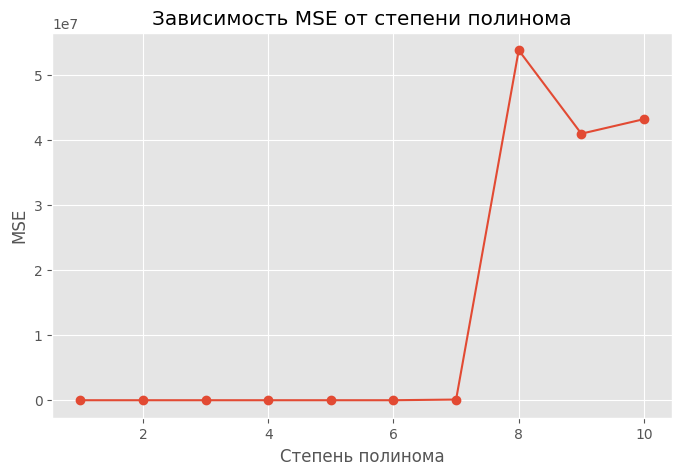

2. Полиномиальная регрессия и зависимость MSE от степени полинома


,Степень полинома,MSE
0,1,1.973046e+00
1,2,2.436827e-01
2,3,1.789025e-01
3,4,1.629659e-01
4,5,6.965099e+00
5,6,7.623268e+00
6,7,1.028147e+05
7,8,5.380073e+07
8,9,4.097061e+07
9,10,4.320750e+07


In [417]:
polynomial_regression_analysis(df)


3. Гребневая регрессия и влияние параметра alpha:
Оптимальная степень полинома: 7 с средним MSE: 3.5639590136802632


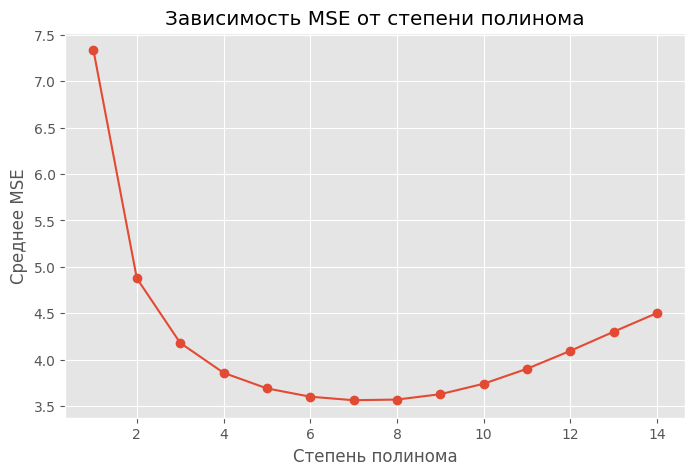

In [418]:
print('\n3. Гребневая регрессия и влияние параметра alpha:')
ridge_regression_analysis(df)


4. Лассо-регрессия и влияние параметра alpha:


c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.365e+00, tolerance: 4.221e-01
  model = cd_fast.enet_coordinate_descent(
c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.491e+00, tolerance: 4.221e-01
  model = cd_fast.enet_coordinate_descent(
c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.743e+00, tolerance: 4.221e-01
  model = cd_fast.enet_

Оптимальная степень полинома: 14 с средним MSE: 12.804695931165126


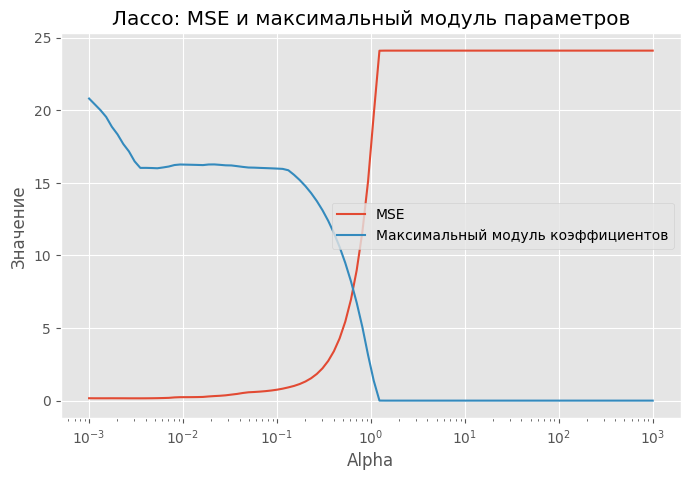

In [419]:
print('\n4. Лассо-регрессия и влияние параметра alpha:')
lasso_regression_analysis(df)

In [420]:
svr_analysis(df)

Лучшие параметры: {'C': 10000, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
5. SVR с различными ядрами


,Ядро,MSE
0,poly,22.959122
1,sigmoid,1.986786
